In [75]:
#!pip install nltk
#!pip install scipy
import nltk
import feedparser
import ssl
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#!pip install -U scikit-learn  should not be needed  but just in case uncomment
#!pip install gensim
from nltk.corpus import stopwords


'''there is a limit in azure notebooks with NLTK in that it does not save the downloaded NLTK libs we need to cache locally
this means we need to uncomment the very next statement and the sequence of commands will be
d   - that tell the downloader you want to download something
when it prompts again enter punkt - the tokenizer 
then it will prompt again for another action
enter d to run another download
enter stopwords and then return
finally, at the last step, enter q and hit return to exit. you can now run as long as your notebook session is alive to
please add the comment, or enter a q if the prompt appears on a subsequent run'''
#nltk.download() #uncomment is you need to download stopwords, punkt, treebank
#!python -m nltk.downloader punkt
#!python -m nltk.downloader stopwords
#!python -m nltk.downloader treebank

from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer 

stopset = set(stopwords.words('english'))  #for now use english jw 1/3/18
stopset.add('...') 
print('passed')

passed


In [76]:
docs  = [] #docs will hold a list of documents per sweep over a rss feed
docn  = 0 #this counts documents which is one to one with n.description entries found
sentn = 0 #this counts sentences within a document so you can think of a document as a list of sentences

In [77]:
#will statically load the docs list with items from a previous run
docs = ['recently, one customer said his asp.net core application used to work very well in oauth authentication all the time, but after he placed a reverse proxy in front of the web application, the authentication fails because of invalid callback path. normally speaking, a callback path is needed when registering an application to the oauth server....', 
        'in this post, premier developer consultant joe healy identifies a possible error you may get when working with an android project on xamarin forms. read about his discovery and eventual solution to fix the ssl/tls implementation issue. recently, i was helping a client with an azure active directory integrated project (adal not msal for some...', 
        'sql server management object smo) is one of the widely used way to interact with sql server due to its feature for directly able to execute mass operation as well as management operation on sql server, instead of old school way of using queries. however when using it , it should also need to be...', 
        "“if you have nothing to say, say nothing.” -- mark twain twain was so smart. i've returned to post after a long, self-imposed break from blogging, as so many great folks inside\xa0 the company work as part of their day jobs several of the areas of interest i've covered on my blog. over the last...", 
        'in this post, app dev manager john abele explores micro-frontend design with asp.net core and mvc. many development teams have spent the last few years organizing and empowering cross-functional teams, building independently managed microservices, and implementing devops pipelines to go faster than ever! these industry shifts, critical for organizations to plan less and react more,...', 
        'php_ini_system level settings cannot be changed from .user.ini or ini_set function. to make change for php_ini_system settings on azure web app, follow the steps, 1. add an app setting to your web app with the key php_ini_scan_dir and value d:homesiteini 2. create an settings.ini file using kudu console (http://&#60;site-name&#62;.scm.azurewebsite.net) in the d:homesiteini directory. 3. add...', 
        "i don't spend a lot of time talking to customers about physical data center security. as a developer using mostly paas or iaas compute platforms, i just assumed that that cloud provider had taken care of it. helping customers with data security (data at rest, data in transit, secure compute), and application code security takes...", 
        'here are top stories we found in our streams this week related to devops, vsts, tfs and other interesting topics. top stories change image size in vsts wiki - jeff bramwellif you’ve been making use of the wiki feature within vsts then you already know how useful it is for providing documentation, notes, etc. in...', 
        'when managing a self-service knowledge base, understanding how customers and employees are searching for and consuming self-service knowledge is an important part of ensuring your content remains relevant and useful for end users. dynamics includes a number of in-built capabilities to help analyze the usage of the knowledge base, including: tracking of article views by...', 
        'Azure Automation For Azure IAAS enthusiasts, Microsoft has provided a platform to automate all the azure services using powershell. The language is tweaked and used as “powershell workflow”. Why to Use Reducing Manual Effort and help in consistent testing Managing resources (deployment/VM’s etc) How to Use Create a powershell workflow in azure web portal and',
        'new titles are coming soon to the microsoft press store! buy now to save 40% on pre-order books or ebooks: https://www.microsoftpressstore.com/store/browse/coming-soon. note: new titles become available for pre-order 90 days prior to availability. some books in the image above will become available during the duration of the sale.',
       'Ransomware attacks are no longer restricted to only deletion of data but are starting to look at attacking backups as well. Taking a backup is only the first step in your protection, it becomes important to safe guard those backups too. This week as we celebrate World Backup Day, let’s look at the key considerations that customers should look for in backup products as they build the defenses to secure their backups from evolving ransomware attacks.',
       'it service management (itsm) tools help large it organizations route and handle service issues and requests. itop is an open source itsm tool written in php. it uses mysql as the backend database. in this blog, i will walk through the steps of installing itop in an azure web app and configure azure active directory',
       'microsoft will have a major presence at spark + ai summit, 2018, in san francisco, the premier event for the apache spark community. rohan kumar, corporate vice president of azure data, will deliver…', 'we are pleased to announce that azure sql data warehouse (azure sql dw) now supports automatic creation of column level statistics. azure sql dw is a fast, flexible, and secure analytics platform for the enterprise.',
       'creating an advanced conversational system is now a simple task with the powerful tools integrated into microsoft’s language understanding service (luis) and bot framework. luis brings together',
       'sql operations studio can be leveraged with azure sql data warehouse (sql dw) to create rich customizable dashboard widgets surfacing insights to your data warehouse.', 'during the last few months, i’ve spoken with a lot of azure customers, both in person and online, about how to prepare for the may 25, 2018 deadline for compliance with the eu’s general data',
        'microsoft will have a major presence at spark + ai summit, 2018, in san francisco, the premier event for the apache spark community. rohan kumar, corporate vice president of azure data, will deliver',
        'we are pleased to announce that azure sql data warehouse (azure sql dw) now supports automatic creation of column level statistics. azure sql dw is a fast, flexible, and secure analytics platform for the enterprise', 
        'we are pleased to announce a series of improvements on application insights profiler and snapshot debugger.', 'creating an advanced conversational system is now a simple task with the powerful tools integrated into microsoft’s language understanding service (luis) and bot framework. luis brings together',
        'apache kafka has changed the way we look at streaming and logging data, and now azure provides tools and services for streaming data into your big data pipeline in azure. today, we proudly announce',
        'last september, i had the privilege to publicly announce our azure confidential computing efforts, where microsoft azure became the first cloud platform to enable new data security capabilities that',
        'this week is microsoft build 2018, our premiere event of the year for our gifted developer audience. with a strong appetite for technology and a desire to learn and immerse themselves in new ways',
       'with azure data factory (adf) visual tools, we listened to your feedback and enabled a rich, interactive visual authoring and monitoring experience. it allows you to iteratively create, configure, test, deploy and monitor data integration pipelines without any friction.', 
        'adobe, ge, toyota, and other enterprises have chosen hdinsight kafka for their streaming analytics pipelines. microsoft office 365 and bing are powered by one of the world’s largest kafka deployments on hdinsight',
        "this azure.source covers build 2018. keep current on what's happening in azure, including what's now in preview, generally available, news & updates, and more", 
        'since the release in 2016, developers are using our azure iot python sdk to write device and back-end applications to connect to azure iot hub and device provisioning service, as well as writing modules for azure iot edge (preview). python is a popular choice for prototyping, and it is gaining traction in the embedded world', 
        'data warehouse automation (dwa) tools are meta-data driven, code generation tools that streamline developing and managing a data warehouse solution.', 
        'the bio-it world conference and expo kicks off today in boston. microsoft is a platinum sponsor of this event. the research and product development being done in the life sciences and healthcare industries are having a tremendous impact.', 
        'on a weekly basis, more than 5 million people find help using microsoft online help and documentation. despite having more than 380,000 pages of articles, references, and tutorials, we each have our own stories of painful gaps', 
        'this is a continuation of our customer success story blog series for azure backup. in the previous case study we covered russell reynolds, here we will discuss how united kingdom’s somerset county council are able to improve their backup and restore efficiency and reduce their backup cost using azure backup', 
        'sql operations studio can be leveraged with azure sql data warehouse (sql dw) to create rich customizable dashboard widgets surfacing insights to your data warehouse.', 
        'during the last few months, i’ve spoken with a lot of azure customers, both in person and online, about how to prepare for the may 25, 2018 deadline for compliance with the eu’s general data',
       'every row of your data is an insight waiting to be found. that is why it is critical you can get every row loaded into your data warehouse. when the data is clean, loading data into azure sql data warehouse is easy using polybase',
       'we are excited to announce that sql data warehouse (sql dw) now supports user-defined restore points! this feature enables you to trigger a manual snapshot of your data warehouse that is transactionally consistent.', 'microsoft has launched a brand new set of go-to-market (gtm) benefits that will be automatically offered to partners with new listings in marketplace, for either azure marketplace or appsource',
       'during the build 2018 keynote, scott hanselman, with help from scott guthrie, showed developers the new features available in azure kubernetes service (aks) and azure dev spaces. to help you learn',
       'today, i’m incredibly excited to announce that the azure kubernetes service (aks) is now generally available. we are also adding five new regions including australia east, uk south, west us, west us 2, and north europe',
       'today we are excited to announce preview of three new features in azure monitor that let you enumerate alerts at scale across log, metric or activity log alerts, filter alerts across subscriptions',
       'last year, we released blob-level tiering. it enables you to transition blobs between the hot, cool, and archive tiers without moving data between accounts',
       'household names such as adobe, jet, asos, schneider electric, and milliman are amongst thousands of enterprises that are powering their big data analytics using azure hdinsight',
       'last month, we announced the public preview release of azure blockchain workbench, which greatly accelerates blockchain application development. since launch, we’ve seen a tremendous amount of engagement and enthusiasm from our customers and partners with thousands of different blockchain apps processing tens of thousands of transactions',
       'azure data factory (adf) is the fully-managed data integration service for analytics workloads in azure',
       'we are pleased to announce a new feature in the maven plugin for azure app service. the plugin provides seamless integration of azure services into maven projects']

In [78]:
#test zone to cleanup and remove punctuation from the original documents - leaves us wiht a list of strings with each
#string containing the origninal text stripped of stopwords, punctuation, and small words ( 2 char or less)
keepset = ('AI','ai','PI','pi','Pi') #small words worth keeping

#print(token in stopset)
#print(len(token)>2 or token.lower() in keepset)
atdoc=0 #track our doc location in the docs list
tstdocs = []
corpastokens = [] #hold the corpus as a list of lists of tokenized sentences
for doc in docs:
    #tokens  = nltk.word_tokenize(doc)      #original working version
    tokens  = nltk.wordpunct_tokenize(doc) #3/15 just to see how it works
    cleanup = [token.lower() for token in tokens if token not in stopset and ( len(token)>2 or token in keepset) ]
    #rawtext = nltk.Text(cleanup)
    #print(type(docs[0]))
    #print(type(rawtext))
    #print(cleanup)
    corpastokens.append(cleanup)
    cleanup = ' '.join(cleanup)
    docs[atdoc] = cleanup #see if this works 3/15
    atdoc = atdoc+1
    tstdocs.append(cleanup) 

    
docn = len(docs)
print('\n number of docs is ',docn)
print(docs[0],'\n',docs[docn-1])
print(corpastokens)



 number of docs is  46
recently one customer said asp net core application used work well oauth authentication time placed reverse proxy front web application authentication fails invalid callback path normally speaking callback path needed registering application oauth server .... 
 pleased announce new feature maven plugin azure app service plugin provides seamless integration azure services maven projects
[['recently', 'one', 'customer', 'said', 'asp', 'net', 'core', 'application', 'used', 'work', 'well', 'oauth', 'authentication', 'time', 'placed', 'reverse', 'proxy', 'front', 'web', 'application', 'authentication', 'fails', 'invalid', 'callback', 'path', 'normally', 'speaking', 'callback', 'path', 'needed', 'registering', 'application', 'oauth', 'server', '....'], ['post', 'premier', 'developer', 'consultant', 'joe', 'healy', 'identifies', 'possible', 'error', 'may', 'get', 'working', 'android', 'project', 'xamarin', 'forms', 'read', 'discovery', 'eventual', 'solution', 'fix', 's

In [79]:
#lets add word vectors
import gensim
from gensim.models.keyedvectors import KeyedVectors 
from gensim.models.word2vec import Word2Vec


To create our own smaller model we need to structure our corpus a bit differently from its current list of sentences and make it a list of lists, with each sub-list a set of inddependent tokens. in effect. each sentence is morphed into a list of tokens and contained in a parent list.
if this is one entry from our current corpus:

'This is a continuation of our customer success story blog series for Azure Backup. In the previous case study we covered Russell Reynolds, here we will discuss how United Kingdom’s Somerset County Council are able to improve their backup and restore efficiency and reduce their backup cost using Azure backup.'

it will now look like:
['This', 'is', 'a', 'continuation', 'of', 'our', 'customer', 'success', 'story', 'blog', 'series', 'for', 'Azure', 'Backup', '.', 'In', 'the', 'previous', 'case', 'study', 'we', 'covered', 'Russell', 'Reynolds', ',', 'here', 'we', 'will', 'discuss', 'how', 'United', 'Kingdom', '’', 's', 'Somerset', 'County', 'Council', 'are', 'able', 'to', 'improve', 'their', 'backup', 'and', 'restore', 'efficiency', 'and', 'reduce', 'their', 'backup', 'cost', 'using', 'Azure', 'backup', '.']

and so on.


In [88]:
#corpastokens has this structure already so we can use it.
num_features   = 75
min_word_count = 2
num_workers    = 4
window_size    = 6
subsampling    = 1e-3 
skorcb         = 1 #skipgram (1) or CBOW(0)

model = Word2Vec( corpastokens,workers=num_workers,size=num_features, min_count=min_word_count,window=window_size,
                 sample=subsampling,hs=1,sg=skorcb) #hs original was 1 - windowsize was 5



In [89]:
#https://machinelearningmastery.com/develop-word-embeddings-python-gensim/ 


[('alerts', 0.9695249795913696), ('francisco', 0.9643243551254272), ('fast', 0.9636154174804688), ('application', 0.9627657532691956), ('backup', 0.9598745107650757), ('look', 0.9594034552574158), ('2018', 0.951857328414917), ('services', 0.9517619609832764), ('secure', 0.9513476490974426), ('apache', 0.9488990306854248)]


C:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


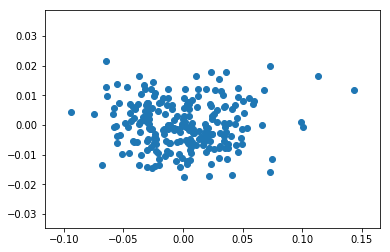

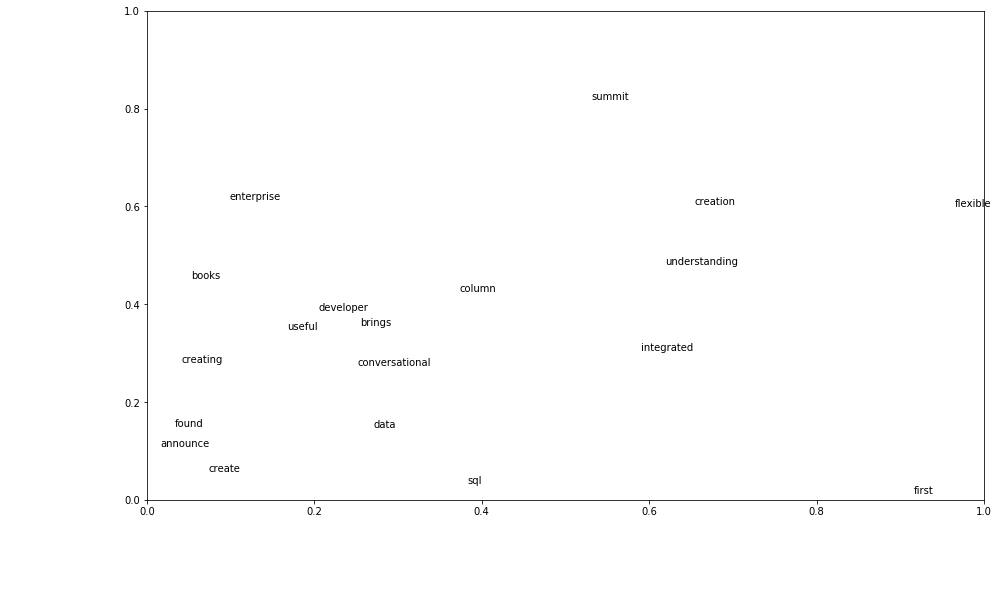

similar to data:  [('fast', 0.9169327020645142), ('important', 0.9072221517562866), ('key', 0.9050723314285278), ('azure', 0.9029145240783691), ('look', 0.897968053817749), ('secure', 0.8954912424087524), ('alerts', 0.8952292203903198), ('2018', 0.8950802087783813), ('service', 0.8917149305343628), ('services', 0.890526533126831)]
similar to service:  [('azure', 0.936855673789978), ('alerts', 0.9295392632484436), ('look', 0.9240469932556152), ('francisco', 0.9221923351287842), ('services', 0.9219522476196289), ('powerful', 0.9183684587478638), ('event', 0.9182925224304199), ('spark', 0.9172494411468506), ('let', 0.9165130853652954), ('application', 0.9162033796310425)]
try a word that may not in the vocabulary - but in the original text used in training 
similar to :  warehouse [('workflow', 0.47140127420425415), ('available', 0.4395145773887634), ('partners', 0.4241505265235901), ('thousands', 0.42234253883361816), ('manual', 0.41871294379234314), ('brings', 0.4139852523803711), ('bec

In [90]:
#!pip install matplotlib
%matplotlib inline 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
print(model.wv.most_similar('azure'))
#print(model['azure'])
#print(model.wv.vocab)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
df = pd.DataFrame(result)
#df.plot(figsize=(15,9))
plt.scatter(result[:, 0], result[:,1 ])
plt.show()

#hack to make a very small vocabularly more visible in the graphics
words = list(model.wv.vocab)
plt.figure(figsize=(15,9))
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0]*50, result[i, 1]*50))
    


plt.show()
print("similar to data: ",model.wv.most_similar('data'))
print('================================================================================================================')
print("similar to service: ",model.wv.most_similar('service'))
print("================================================================================================================")
print('try a word that may not in the vocabulary - but in the original text used in training ')
aword='warehouse'
if(aword in words):
    print('similar to : ',aword,model.wv.most_similar(aword))
    
print('---------------------------')
print("try similarity of two words ",model.wv.similarity('azure','spark'))
print("try similarity of two words ",model.wv.similarity('azure','data'))
print("try similarity of two words ",model.wv.similarity('azure','kafka'))
print("try similarity of two words ",model.wv.similarity('data','kafka'))
print("try similarity of two words ",model.wv.similarity('aks','kubernetes'))

In [83]:
#some other tests
print(model.wv.similarity('azure', 'blockchain')) #try kafka
print(model.wv.similarity('azure', 'secure'))
print(model.wv.similarity('hdinsight', 'kafka'))
print(model.wv.similarity('security', 'backups'))
sss = 'recently one customer said asp net core application'
senttoscore = "azure backups over a data warehouse" #really only useful using hierarchical softmax so this is noise

print( "Scoring: ",sss,model.score([sss.split()]))

print('look at an items in detail...')
pdvocab = pd.Series(model.wv.vocab)
print(pdvocab.iloc[12:13])
print('-----------------')
aword='azure'
print(aword,pdvocab[aword])
print('-----------------')

print('azure blockchain distance: ',np.linalg.norm(model.wv['azure']-model.wv['blockchain']))

print('azure hdinsight distance: ',np.linalg.norm(model.wv['analytics']-model.wv['apache']))

print('the overall model: ',model)
print('model vector for: ',aword,model[aword][0:74]) #last arg is the vector dimension

0.11386075643230051
0.022152606399311964
0.23389465566360357
-0.06550849287801894
Scoring:  recently one customer said asp net core application [-324.4263]
look at an items in detail...
accounts    Vocab(code:array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1...
dtype: object
-----------------
azure Vocab(code:array([1, 1, 0, 1, 0], dtype=uint8), count:44, index:0, point:array([647, 646, 644, 639, 630], dtype=uint32), sample_int:807409979)
-----------------
azure blockchain distance:  0.04925724
azure hdinsight distance:  0.049475837
the overall model:  Word2Vec(vocab=649, size=75, alpha=0.025)
model vector for:  azure [-0.00013219 -0.00435971 -0.00191226 -0.00258101 -0.00381363  0.00016474
 -0.00511923  0.00419698 -0.00106773  0.00137378 -0.00325962 -0.00030125
  0.00216919  0.00433996 -0.00048555  0.00623498 -0.00119852 -0.00460559
  0.00277737 -0.00068151 -0.00666844 -0.00218212  0.00350475  0.00898971
  0.00308799 -0.00475775  0.00352444  0.0087028   0.00109819 -0.00447903
 -0.00430133 -0.0051621

C:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [84]:
#let's try phrases
bigrams = gensim.models.Phrases(corpastokens)
modelbg = Word2Vec(bigrams[corpastokens],window=3,size=75,min_count=2,hs=1,sg=skorcb) #hs original 1
phrases = list(modelbg.wv.vocab)
#print(phrases)
print("---------------------------------break----------------------------------------------")

print(modelbg.wv.similarity('azure', 'blockchain')) #was kafka
print(modelbg.wv.similarity('azure', 'security'))
print(modelbg.wv.similarity('hdinsight', 'kafka'))
print(modelbg.wv.similarity('python', 'code'))
print('--------------------------------break--------------------------------------------------')
senttoscore = "kubernetes services azure"
print('keep in mind - this is dummy stuff without hs=1 in the model definition for hierarchical softmax')
print( "Scoring: ",senttoscore,modelbg.score([senttoscore.split()]))
senttoscore = "azure backups over a security warehouse"
print( "Second Scoring: ", senttoscore,modelbg.score([senttoscore.split()]))

#finally - save the model is ascii format so we can eyeball it
model.wv.save_word2vec_format('wordmodel.txt',binary=False)

---------------------------------break----------------------------------------------


C:\anaconda3\envs\tensorflow\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


-0.03346573484771784
0.1325885232462114
0.18121406441122373
-0.1153451465622537
--------------------------------break--------------------------------------------------
keep in mind - this is dummy stuff without hs=1 in the model definition for hierarchical softmax
Scoring:  kubernetes services azure [-29.74101]
Second Scoring:  azure backups over a security warehouse [-26.914043]
